In [197]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import random

In [791]:
def simulation_data(random_seed, num_significant_features):
    import numpy as np
    import pandas as pd

    # Set seed for reproducibility
    np.random.seed(random_seed)

    # Define the number of features, cases, and controls
    num_cases = 30
    num_controls = 30
    num_features = 300

    # Produce case and control data
    case_data = np.zeros((num_cases, num_features))
    control_data = np.zeros((num_controls, num_features))

    # Generate indices of significant features related to the outcome
    significant_feature_indices = np.random.choice(num_features, num_significant_features, replace=False)

    # Generate data for each feature for cases and controls
    for j in range(num_features):
        # Generate different normal distribution parameters for each feature
        mean_case = np.random.uniform(50, 70)
        std_case = np.random.uniform(0, 50)
        mean_control = np.random.uniform(50, 70)  
        std_control = np.random.uniform(0, 50)

        # Generate data for cases and controls
        case_data[:, j] = np.random.normal(loc=mean_case, scale=std_case, size=num_cases)
        control_data[:, j] = np.random.normal(loc=mean_control, scale=std_control, size=num_controls)
        
        # For features significantly related to the outcome, add additional noise to enhance correlation
        if j in significant_feature_indices:
            case_data[:, j] += np.random.normal(loc=50, scale=40, size=num_cases)
            #control_data[:, j] += np.random.normal(loc=20, scale=15, size=num_controls)

    # Create DataFrame for cases and controls
    case_df = pd.DataFrame(case_data, columns=[f'feature_{i}' for i in range(num_features)])
    control_df = pd.DataFrame(control_data, columns=[f'feature_{i}' for i in range(num_features)])

    # Add the outcome column
    case_df['cancer'] = 1
    control_df['cancer'] = 0

    # Concatenate case and control datasets
    simulated_data = pd.concat([case_df, control_df], ignore_index=True)
    return case_df, control_df, simulated_data


In [792]:
case_df, control_df, simulated_data = simulation_data(107,0)

In [793]:
# Change values less than 0 to 0
simulated_data[simulated_data< 0] = 0
case_df[case_df< 0] = 0
control_df[control_df< 0] = 0
#simulated_data

In [794]:
case_df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_291,feature_292,feature_293,feature_294,feature_295,feature_296,feature_297,feature_298,feature_299,cancer
0,62.009950,44.896532,55.200034,46.339351,44.534088,62.343674,63.816734,43.173957,67.599518,0.000000,...,66.432340,63.142825,42.589375,71.019738,59.070724,39.513919,32.271642,32.332290,66.653518,1
1,86.963716,81.247101,30.600830,45.493685,45.624349,55.546432,59.147865,55.393026,88.554642,60.702485,...,56.673837,61.695277,108.873081,66.536456,59.060029,14.916667,57.730255,20.021807,71.628723,1
2,68.352849,107.404970,133.921969,71.765118,32.330354,54.660912,70.376608,56.784997,75.400920,81.572498,...,37.993691,61.325485,57.330798,71.720639,63.185445,41.189590,90.889505,51.780657,57.575784,1
3,97.895418,75.164552,59.907861,75.467670,74.326639,56.457608,58.460428,55.735103,81.236617,112.167058,...,61.680958,55.369446,64.238739,68.681275,62.740701,55.611470,103.343984,77.146486,60.422312,1
4,23.769621,71.775962,74.729242,23.191279,89.228166,56.172406,67.118515,50.432014,58.155494,21.750476,...,46.921353,38.029128,67.004630,70.029064,59.487921,116.027374,58.713851,49.523092,72.932385,1
5,54.473480,33.625879,19.324742,80.556198,60.250876,58.745766,26.657221,57.824664,120.747077,49.358050,...,63.409683,67.737780,37.773133,69.551160,63.952325,45.907055,105.164283,39.788439,40.017118,1
6,81.903965,98.094616,114.583887,44.291443,34.358067,57.778335,52.806989,60.173045,68.591301,53.701355,...,26.988546,22.422996,57.967101,68.351327,59.366284,77.607770,52.869474,67.480550,72.159281,1
7,70.448645,85.799090,69.474951,58.113159,110.369516,57.740133,48.087524,62.079572,61.986089,107.068518,...,55.790395,77.206576,38.905130,68.104286,56.039158,56.400796,46.806262,61.534629,70.496013,1
8,38.539544,28.959145,72.199375,68.526845,80.005718,57.920261,57.098770,55.033435,33.910217,63.315713,...,44.599068,57.979504,124.741323,73.184455,56.465741,17.490177,67.893375,75.520139,55.109571,1
9,71.937309,0.000000,93.541033,61.267508,45.655764,55.711461,54.988871,55.778238,101.807673,93.948087,...,52.458347,79.792347,2.642484,68.731289,58.228018,111.491498,36.241847,74.203834,74.377441,1


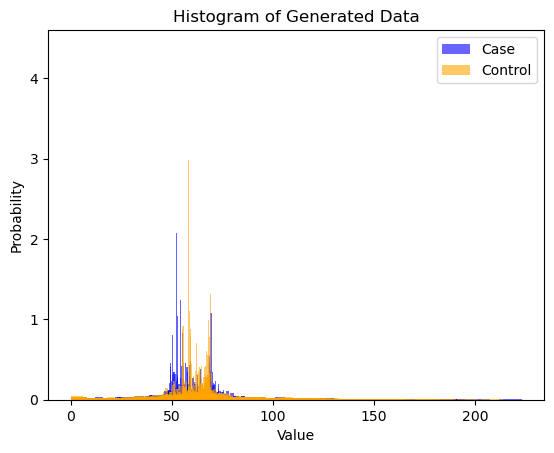

In [795]:
# Plotting the histograms for the case group
import matplotlib.pyplot as plt

for i in range(0, case_df.shape[1]-1):
    plt.hist(case_df.iloc[:, i], bins=20, density=True, alpha=0.6, label=f"Case", color='blue')

# Plotting the histograms for the control group
for i in range(0, control_df.shape[1]-1):
    plt.hist(control_df.iloc[:, i], bins=20, density=True, alpha=0.6, label=f"Control", color='orange')

# Getting the handles and labels for the legend
handles, labels = plt.gca().get_legend_handles_labels()

# Showing only two legends with specified colors
plt.legend([handles[0],handles[301]], [labels[0],labels[301]], loc='upper right')  # Use [:2] to select the first two handles and labels

plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Histogram of Generated Data')
# Set the y-axis limit
plt.ylim(0, 4.6)
plt.show()


In [798]:
from scipy.stats import ttest_ind
def calculate_num_significant_feature(case_df, control_df):
    """
    Calculate the number of significant features

    Parameters:
        case_df (dataframe)
        control_df (dataframe)

    Returns:
        int: the number of significant features
    """

    significant_features_p_values = []

    # Loop through each feature index
    for feature_index in range(case_df.shape[1] - 1):
        case_feature_values = case_df[f'feature_{feature_index}']
        control_feature_values = control_df[f'feature_{feature_index}']

        # Calculate the significance of the difference between case and control groups using t-test
        t_statistic, p_value = ttest_ind(case_feature_values, control_feature_values)

        # Record the result
        significant_features_p_values.append((feature_index, p_value))

    from statsmodels.stats.multitest import multipletests

    # Get p-values of significant features
    p_values = [p_value for _, p_value in significant_features_p_values]

    # Bonferroni correction
    adjusted_p_values = multipletests(p_values, method='bonferroni')[1]

    # Count the number of significant features
    num_significant_feature = 0
    for p_value in adjusted_p_values:
        if p_value < 0.05:
            num_significant_feature += 1

    return num_significant_feature




In [755]:
"""
def score1(l1, t):
    # Import itertools module for combinations
    import itertools
    
    # Generate all possible combinations of length 2 from l1
    combinations = list(itertools.combinations(l1, 2))
    #col_map (dict): Mapping of parameter index to its value and position of t.
    col_map = {i: col for i, col in enumerate(t)}
    print(col_map)
    # Create a dictionary to map parameter index to its value and position
    dic = {}
    n = len(col_map)
    for key, value in col_map.items():
        dic[key] = [n-l1[key], value]
    print(dic)
    # Initialize the U score
    u = 0
    
    # Iterate through all combinations
    for i in combinations:  
        # Check if the values in the combination follow the specified order
        if ((dic[i[1]][0] > dic[i[0]][0]) & (dic[i[1]][1] > dic[i[0]][1])) or ((dic[i[1]][0] < dic[i[0]][0]) & (dic[i[1]][1] < dic[i[0]][1])):
            # Increment the U score if the order is correct
            u += 1
        # Check if the values in the combination follow the opposite order
        elif ((dic[i[1]][0] < dic[i[0]][0]) & (dic[i[1]][1] > dic[i[0]][1])) or ((dic[i[1]][0] > dic[i[0]][0]) & (dic[i[1]][1] < dic[i[0]][1])):
            # Decrement the U score if the order is opposite
            u += -1
        else:
            # Do nothing if the values are equal
            u += 0
    
    # Return the calculated U score
    return u
"""

In [839]:
def score(l1,t):
    """
    Calculate the U score for a given permutation and parameter values.

    Parameters:
        l1 (list): Ground truth permutation.
        t (list): values corresponding to the sample permutation.

    Returns:
        int: U score.
    """
    import itertools
    # Generate all possible combinations of length 2 from l1
    combinations = list(itertools.combinations(l1, 2))
    #col_map (dict): Mapping of parameter index to its value and position of t.
    col_map = {i: col for i, col in enumerate(t)}
    # Create a dictionary to map parameter index to its value and position
    dic = {}
    for key, value in col_map.items():
        dic[key] = [l1.index(key), value]
    #print(dic)

    u = 0
    for i in combinations:  
        if (( dic[i[1]][0] > dic[i[0]][0]) & (dic[i[0]][1] > dic[i[1]][1])) or ((dic[i[1]][0] < dic[i[0]][0]) & (dic[i[0]][1] < dic[i[1]][1])):
            u += 1
    #print(u,i dic[i[1]][0],dic[i[0]][0],dic[i[0]][1],dic[i[1]][1])
        if ((dic[i[1]][0] < dic[i[0]][0]) & (dic[i[0]][1] > dic[i[1]][1])) or ((dic[i[1]][0] > dic[i[0]][0]) & (dic[i[0]][1] < dic[i[1]][1])):
            u += -1
    #print(u,i[1],i[0],t[i[0]-1],t[i[1]-1])
        else:
            u += 0
        #print(u,i,dic[i[1]][0],dic[i[0]][0],dic[i[0]][1],dic[i[1]][1])
    # Return the calculated U score
    return u

In [840]:
from joblib import Parallel, delayed
import multiprocessing

def cal_score3(l1, selected,n_case,n_control):
    """
    Calculate the U score for observations in parallel.

    Parameters:
        l1 (list): Ground truth permutation.
        selected (DataFrame): Selected data containing observations and parameters.
        n_case (int): Number of cases.
        n_control (int): Number of controls.
        score_function (function): Function to compute the U score.

    Returns:
        tuple: U score, saved U values, U case, U control.
    """
    def compute_score(r, t):
        #print(f"Col map: {col_map}")
        #case
        if selected.iloc[r, -1] == 1:
            return score(l1, t), r,1
        #control
        elif selected.iloc[r, -1] == 0:
            return score(l1, t), r,0

    num_cores = multiprocessing.cpu_count()
    results = Parallel(n_jobs=num_cores)(
        delayed(compute_score)(r, selected.iloc[r, :-1].tolist())
        for r in range(len(selected))
    )
    #print(results)
    u_case = sum(result[0] for result in results if result[2] == 1)/n_case
    #print(sum(result[0] for result in results if result[2] == 1),n_case)
    u_control = sum(result[0] for result in results if result[2] == 0)/n_control
    #print(sum(result[0] for result in results if result[2] == 0),n_control)
    save_u = {result[1]: result[0] for result in results}
    u = u_case - u_control
    return round(u,2), save_u, round(u_case,2), round(u_control,2)

In [801]:
#try a simple example
a = [0,2,1]#acb

In [802]:
# Define the data as a dictionary
data = {'a': [1,5],
        'b': [3,2],
        'c': [2,3],
       'cancer':[1,0]}
#case: bca
#control:acb
# Create the DataFrame
train = pd.DataFrame(data)
train

,a,b,c,cancer
0,1,3,2,1
1,5,2,3,0


In [803]:
cal_score3(a,train,1,1)

(-6.0, {0: -3, 1: 3}, -3.0, 3.0)

In [804]:
l1 = [2,1,0]#cba
#l1 = [0,1,2]#abc
t = [1, 3, 2]#bca

score(l1,t)  

{0: [2, 1], 1: [1, 3], 2: [0, 2]}


1

In [805]:
#try a simple example
# Create a dictionary with sample data

data = {
    'Name': ['A', 'B', 'C', 'D','E','F'],
    'case1': [100, 50, 20, 10, 5, 1],
    'case2': [50, 100, 10, 5, 1, 20],
    'case3': [100, 50, 1, 5, 20, 10],
    'case4': [100, 50, 20, 1, 5, 10],
    'control1': [1, 5, 10, 20, 50, 100],
    'control2': [5, 1, 20, 10, 100, 50],
    'control3': [20, 10, 1, 5, 50, 100],
    'control4': [10, 1, 5, 20, 100, 50],
}

# Create a data frame from the dictionary
dft = pd.DataFrame(data)

# Print the data frame
print(dft)


  Name  case1  case2  case3  case4  control1  control2  control3  control4
0    A    100     50    100    100         1         5        20        10
1    B     50    100     50     50         5         1        10         1
2    C     20     10      1     20        10        20         1         5
3    D     10      5      5      1        20        10         5        20
4    E      5      1     20      5        50       100        50       100
5    F      1     20     10     10       100        50       100        50


In [806]:
dft1 = dft.transpose()
dft1

,0,1,2,3,4,5
Name,A,B,C,D,E,F
case1,100,50,20,10,5,1
case2,50,100,10,5,1,20
case3,100,50,1,5,20,10
case4,100,50,20,1,5,10
control1,1,5,10,20,50,100
control2,5,1,20,10,100,50
control3,20,10,1,5,50,100
control4,10,1,5,20,100,50


In [807]:
dft1.columns = dft1.iloc[0]
dft1 = dft1.drop(dft1.index[0])
dft1

Name,A,B,C,D,E,F
case1,100,50,20,10,5,1
case2,50,100,10,5,1,20
case3,100,50,1,5,20,10
case4,100,50,20,1,5,10
control1,1,5,10,20,50,100
control2,5,1,20,10,100,50
control3,20,10,1,5,50,100
control4,10,1,5,20,100,50


In [808]:
dft1['cancer'] = 0  # initialize the column to 0
dft1.iloc[0:4, -1] = 1
dft1

Name,A,B,C,D,E,F,cancer
case1,100,50,20,10,5,1,1
case2,50,100,10,5,1,20,1
case3,100,50,1,5,20,10,1
case4,100,50,20,1,5,10,1
control1,1,5,10,20,50,100,0
control2,5,1,20,10,100,50,0
control3,20,10,1,5,50,100,0
control4,10,1,5,20,100,50,0


In [809]:
a = [0,1,2,3,4,5]
cal_score3(a,dft1,4,4)

(18.5, {0: 15, 1: 7, 2: 5, 3: 9, 4: -15, 5: -9, 6: -5, 7: -9}, 9.0, -9.5)

In [810]:
dft1.iloc[0,:-1].tolist()

[100, 50, 20, 10, 5, 1]

In [811]:
score(a,dft1.iloc[0,:-1].tolist())

{0: [0, 100], 1: [1, 50], 2: [2, 20], 3: [3, 10], 4: [4, 5], 5: [5, 1]}


15

In [812]:
import random
import time

# Initialize variables and data
a = range(0, len(dft1.columns) - 1)
my_list = list(a)

# Define a set to store generated permutations
visit = set()

# Set random seed for reproducibility
random.seed(807)
best_score, save_u, u_case, u_control = cal_score3(my_list, dft1, train_freq1, train_freq0)
#best_score = float('-inf')
save = {}
save_score = {}
save_best_u = {}
score_u = [best_score]
save_score[best_score] = my_list.copy()
# Start time
start_time = time.time()

# Iterate for a certain number of iterations
for k in range(200):
    # Randomly select two indices to swap
    i = random.randint(0, len(my_list) - 1)
    j = random.randint(0, len(my_list) - 1)
    #print(i,j)
    # Swap elements at indices i and j
    my_list[i], my_list[j] = my_list[j], my_list[i]
    
    # Skip this iteration if permutation has been visited before
    if tuple(my_list) in visit or i == j:
        continue
    
    # Add the current permutation to the visit set
    visit.add(tuple(my_list))
    
    # Calculate score and other metrics
    score1, save_u, u_case, u_control = cal_score3(my_list, dft1, train_freq1, train_freq0)
    score_u.append(score1)
    # Update best score if applicable
    if score1 > best_score:
        best_score = score1
        save_score[best_score] = my_list.copy()
        save_best_u = save_u.copy()
    
    # Print iteration and time information
    if k % 100 == 0:
        current_time = time.time() - start_time
        print("Iteration:", k)
        print("Time taken:", current_time, "seconds")

# End time
end_time = time.time()
total_time = end_time - start_time
print("Best score:", best_score)
print("Total time taken:", total_time, "seconds")


Iteration: 0
Time taken: 0.004409074783325195 seconds
Best score: 18.5
Total time taken: 0.743610143661499 seconds


In [813]:
best_score

18.5

In [814]:
save_score

{18.5: [0, 1, 2, 3, 4, 5]}

In [815]:
save_score[best_score]

[0, 1, 2, 3, 4, 5]

In [817]:
from sklearn.metrics import roc_curve, roc_auc_score
#calculate AUC 
def cal_auc(data,permutation,save_u):
    """
    Parameters:
        data(dataframe):input dataframe
        permutation(list):permutation of a list
        save_u(dic): U values for each observation

    Returns:
        AUC(int)
    """
    subset= data.iloc[:, permutation]
    subset['cancer'] = list(data['cancer'])
    subset['score'] = list(save_u.values())

    fpr, tpr, thresholds = roc_curve(subset['cancer'],subset['score'])
    auc = roc_auc_score(subset['cancer'],subset['score'])
    return auc

In [837]:
def rbl(data,num_val,g):
    """
    Find the optimal permutation.

    Parameters:
        data(dataframe):input dataframe
        num_val(int):the number of validation dataset to be sampled
        g(float): after g percentage of iterations, check the performance

    Returns:
        train_auc_save(list):saved train auc 
        val_auc_save(list):saved validation auc
        val_auc_save2(list):saved validation2 auc
        test_auc_save(list):saved test auc
        save[best_score](list):best permutation
        
    """
    import random
    X_train, test = train_test_split(data, test_size=0.3, random_state=42)
    # Split temp set into validation and test sets (70% train, 30% validation)
    train, val = train_test_split(X_train, test_size=0.3, random_state=4)
    
    # Randomly sample validation data
    val2 = train.sample(num_val,random_state=807)
    # Calculate class frequencies
    train_freq = train['cancer'].value_counts()
    val_freq = val['cancer'].value_counts()
    val2_freq = val2['cancer'].value_counts()
    test_freq = test['cancer'].value_counts()
    # Extract class frequencies for each set
    train_freq0 = train_freq[0]
    train_freq1 = train_freq[1]
    val_freq0 = val_freq[0]
    val_freq1 = val_freq[1]
    val2_freq0 = val2_freq[0]
    val2_freq1 = val2_freq[1]
    test_freq0 = test_freq[0]
    test_freq1 = test_freq[1]
    
    #find a better initilized score
    # Initialize lists to store scores and AUCs
    a = range(0,len(train.columns)-1)
    my_list = list(a)
    score_save_b = []
    train_auc_b = []
    score_u_v_b = []
    val_auc_b = []
    score_u_v_b2 = []
    val_auc_b2 = []
    auc_base_train = 0
    auc_base_val = 0
    auc_base_val2 = 0
    best_permu_base = []
    import time
    start_time = time.time()  # Record the start time

    for k in range(0,30):
        random.seed(k)
        random.shuffle(my_list)
        # Calculate scores and AUCs
        score_b,save_b,u_case_b,u_control_b = cal_score3(my_list,train,train_freq1,train_freq0)
        score_save_b.append(score_b)
        auc_train = cal_auc(train,my_list,save_b)
        train_auc_b.append(round(auc_train,2))

        score_val_b,save_u_v_b,u_case_v_b,u_control_v_b = cal_score3(my_list,val,val_freq1,val_freq0)
        score_u_v_b.append(score_val_b)
        auc_val = cal_auc(val,my_list,save_u_v_b)
        val_auc_b.append(round(auc_val,2))

        score_val_b2,save_u_v_b2,u_case_v_b2,u_control_v_b2 = cal_score3(my_list,val2,val2_freq1,val2_freq0)
        score_u_v_b2.append(score_val_b2)
        auc_val2 = cal_auc(val2,my_list,save_u_v_b2)
        val_auc_b2.append(round(auc_val2,2))
        
        # Check if scores and AUCs meet conditions
        if auc_train > 0.5 and auc_val > 0.5 and auc_val2 > 0.5 and ((auc_train+auc_val+auc_val2)/3 > (auc_base_train+auc_base_val+auc_base_val2)/3):
            #print(score_b)
            print(auc_train)
            print(auc_val)
            print(auc_val2)
            #print(cal_score3(my_list,train,17,16))
            auc_base_train = auc_train
            auc_base_val = auc_val
            auc_base_val2 = auc_val2
            #print(my_list)
            best_permu_base = my_list.copy() 
            #print(k)
            best_save_b = save_b
    

    #add early stop
    #train
    #import random
    
    a = range(0,len(train.columns)-1)
    #change initial list as previous permutation
    #if find a good initilization
    if best_permu_base:
        my_list = best_permu_base
    else:
        random.seed(200)
        random.shuffle(my_list)
        my_list = list(a)
    """
    my_list = list(a)
    random.seed(807)
    random.shuffle(my_list)
    """
    # Initialize variables for MCMC
    best_score = float('-inf')

    #best_converted = 0
    save = {}
    save_score = []
    save_u = {}
    #save_best_u = {}

    prob = 0
    beta_range = [0.1,1,5,10]
    score0 = float('-inf')
    #val
    score_val0 = float('-inf')
    score_val20 = float('-inf')
    best_beta = 1
    beta = 0
    #use visit to list to avoid duplication
    visit = set()
    score_u = []
    score_case = []
    score_control = []
    train_auc_save = []

    score_u_v = []
    score_case_v = []
    score_control_v = []
    val_auc_save = []

    score_u_v2 = []
    score_case_v2 = []
    score_control_v2 = []
    val_auc_save2 = []

    score_u_t = []
    score_case_t = []
    score_control_t = []
    test_auc_save = []

    #for early stop
    cur = float('inf')
    cur_auc = 0
    # Main loop for MCMC
    for k in range(2001):
        random.seed(k)
        
        i = random.randint(0, len(my_list) - 1)
        j = random.randint(0, len(my_list) - 1)
        
            #skip this i and j if they have been checked before
        if tuple(my_list) in visit or i == j:
            continue
        # Add the current permutation to the visit set
        visit.add(tuple(my_list))
        
        #swap the two elements
        #my_list_copy[i], my_list_copy[j] = my_list_copy[j], my_list_copy[i] 
        my_list[i], my_list[j] = my_list[j], my_list[i]
        #print('a'+ str(my_list))
        #save train
        score1,save_u,u_case,u_control = cal_score3(my_list,train,train_freq1,train_freq0)
        score_u.append(score1)
        score_case.append(u_case)
        score_control.append(u_control)
        auc_train = cal_auc(train,my_list,save_u)
        #print("train auc:", auc_train)
        train_auc_save.append(round(auc_train,2))

        #save val
        score_val,save_u_v,u_case_v,u_control_v = cal_score3(my_list,val,val_freq1,val_freq0)
        score_u_v.append(score_val)
        score_case_v.append(u_case_v)
        score_control_v.append(u_control_v)
        auc_val = cal_auc(val,my_list,save_u_v)
        #print("val auc:", auc_val)
        val_auc_save.append(round(auc_val,2))

        #save val2
        score_val2,save_u_v2,u_case_v2,u_control_v2 = cal_score3(my_list,val2,val2_freq1,val2_freq0)
        score_u_v2.append(score_val2)
        score_case_v2.append(u_case_v2)
        score_control_v2.append(u_control_v2)
        auc_val2 = cal_auc(val2,my_list,save_u_v2)
        #print("val auc2:", auc_val2)
        val_auc_save2.append(round(auc_val2,2))

        #save test
        score_t,save_u_t,u_case_t,u_control_t = cal_score3(my_list,test,test_freq1,test_freq0)
        score_u_t.append(score_t)
        score_case_t.append(u_case_t)
        score_control_t.append(u_control_t)
        auc_test = cal_auc(test,my_list,save_u_t)
        #print("test auc:", auc_test)
        test_auc_save.append(round(auc_test,2))

        #MCMC
        if (score1 > score0) and (score_val > score_val0) and (score_val2 > score_val20):
            #swap i and j
            #my_list[i], my_list[j] = my_list[j], my_list[i]
            #prob = 1
            #update scores
            score0 = score1
            score_val0 = score_val
            score_val20 = score_val2

            save_best_u = []
            best_score = score1
            best_score0 = score_val
            #best_converted = i
            my_list_copy = my_list.copy()
            save[best_score] = my_list_copy
            #print(len(my_list_copy))
            save_score.append(best_score)
            save_best_u = save_u   

            best_beta = beta
        else:
            my_list[i], my_list[j] = my_list[j], my_list[i]
        #early stop
        if k>0 and k%500 == 0:
            print(k)
            cur = k
            cur_auc = auc_train
            #print(k * 0.3)
        #print(cur_auc, auc_val)
        if k >= cur + cur * g and cur_auc >= auc_train:
            print(f"Stopping at iteration {k} because AUC did not increase.")
            break

        #print(k)
        if k %100 == 0:
            current_time = time.time() - start_time  # Calculate the elapsed time
            print("Iteration:", k)
            print("Time taken:", current_time, "seconds")

    end_time = time.time()  # Record the end time
    total_time = end_time - start_time  # Calculate the total time

    print("Total time taken:", total_time, "seconds")        
    
    return train_auc_save,val_auc_save,val_auc_save2,test_auc_save,save[best_score]

In [841]:
rbl(simulated_data, num_val=15, g=0.2)

0.5202020202020202
0.6388888888888888
0.6296296296296297
0.7676767676767676
0.6388888888888888
0.6481481481481481


KeyboardInterrupt: 

In [829]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import random
import time
def cal_auc_per_data(df,num_val,split_per):
    """
    Parameters:
        data(dataframe):input dataframe
        num_val(int):the number of validation dataset to be sampled
        split_per(float): the percentage to split train and test data

    Returns:
        AUC(int): train AUC
        AUC(int): test AUC
    """
    # Split data into train, validation, and test sets
    X_train, test = train_test_split(df, test_size=split_per, random_state=42)
    # Split temp set into validation and test sets (70% train, 30% validation)
    train, val = train_test_split(X_train, test_size=0.3, random_state=4)
    # Randomly sample validation data
    val2 = train.sample(num_val,random_state=807)
    # Calculate class frequencies
    train_freq = train['cancer'].value_counts()
    val_freq = val['cancer'].value_counts()
    val2_freq = val2['cancer'].value_counts()
    test_freq = test['cancer'].value_counts()
    # Extract class frequencies for each set
    train_freq0 = train_freq[0]
    train_freq1 = train_freq[1]
    val_freq0 = val_freq[0]
    val_freq1 = val_freq[1]
    val2_freq0 = val2_freq[0]
    val2_freq1 = val2_freq[1]
    test_freq0 = test_freq[0]
    test_freq1 = test_freq[1]

    # Initialize variables to track best parameters and results
    best_g = 0
    best_val = 0
    g_range = [0.2,0.3]
    for i in g_range:
        a,b,c,d,e = rbl(df,num_val,i)
        #print(e)
        # Calculate AUC on validation set with the obtained permutation
        score_val,save_u_v,u_case_v,u_control_v = cal_score3(e,val,val_freq1,val_freq0)
        # Update best parameter and AUC if current AUC is higher
        auc_val = cal_auc(val,e,save_u_v)
        if auc_val > best_val:
            best_g = i
            best_val = auc_val
            best_perm = e
            print("best_g: "+ str(i))
            print("best_val: "+ str(best_val))
            # If AUC is perfect, stop optimization
            if best_val == 1.0:
                break

    print('best permutation: '+ str(best_perm))
    #calculate train auc
    score1,save_u,u_case,u_control = cal_score3(best_perm,train,train_freq1,train_freq0)
    train_auc = cal_auc(train,best_perm,save_u)
    #calculate test auc
    score_t,save_u_t,u_case_t,u_control_t = cal_score3(best_perm,test,test_freq1,test_freq0)
    test_auc = cal_auc(test,best_perm,save_u_t)
    
    return train_auc, test_auc

In [842]:
cal_auc_per_data(simulated_data, num_val=15, split_per=0.3)

0.5202020202020202
0.6388888888888888
0.6296296296296297
0.7676767676767676
0.6388888888888888
0.6481481481481481


KeyboardInterrupt: 

In [843]:
#compare with LR
def LR_SF(n_fea,trainX,testX,trainY,testY):
    # Create a logistic regression model
    from sklearn.linear_model import LogisticRegression

    model = LogisticRegression(max_iter=10000)
    #select features
    from sklearn.feature_selection import RFE
    from sklearn.metrics import roc_auc_score
    
    rfe = RFE(model, n_features_to_select=n_fea)
    rfe.fit(trainX,trainY)
    true_indices = [index for index, value in enumerate(list(rfe.support_)) if value == True]
    selected_elements = [trainX.columns[i] for i in true_indices]
    X_train1 = trainX[selected_elements]
    X_test1 = testX[selected_elements]
    #fit LR on selected dataset
    LR = LogisticRegression(penalty=None,random_state=42,max_iter=10000,solver='saga')
    LR.fit(X_train1, trainY)
    y_pred_train =LR.predict_proba(X_train1)[:, 1]  # Probabilities of positive class
    train_auc = roc_auc_score(trainY, y_pred_train)
    #print("Train AUC:", train_auc)
    y_pred_test =LR.predict_proba(X_test1)[:, 1]  # Probabilities of positive class
    test_auc = auc = roc_auc_score(testY, y_pred_test)
    #print("Validation AUC:", test_auc)
    return train_auc,test_auc

In [844]:
def LR_SIMU(df,split_per):
    df_lr = df.fillna(0)
    y = df_lr['cancer']
    X = df_lr.drop('cancer', axis=1)
    trainX,testX,trainY, testY = train_test_split(X,y, test_size=split_per, random_state=42)
    X_train, X_val, Y_train, Y_val = train_test_split(trainX,trainY, test_size=0.3, random_state=4)
    from sklearn.linear_model import LogisticRegression
    best_auc = 0
    best_n = 0
    for n in range(1,11):
        train_auc,val_auc = LR_SF(n, X_train, X_val, Y_train, Y_val)
        if val_auc > best_auc:
            best_n = n
            #print('number of features: ' + str(n))
            best_auc = val_auc
            #print(best_auc)
    
    from sklearn.feature_selection import RFE
    model = LogisticRegression(max_iter=10000)
    print('best_n: ' + str(best_n))
    rfe = RFE(model, n_features_to_select=best_n)
    rfe.fit(X_train,Y_train)
    true_indices = [index for index, value in enumerate(list(rfe.support_)) if value == True]
    selected_elements = [X_train.columns[i] for i in true_indices]
    X_train1 = X_train[selected_elements]
    X_test1 = testX[selected_elements]
    #fit LR on selected dataset
    LR = LogisticRegression(penalty=None,random_state=42,max_iter=10000,solver='saga')
    LR.fit(X_train1, Y_train)
    y_pred_train =LR.predict_proba(X_train1)[:, 1]  # Probabilities of positive class
    train_auc = roc_auc_score(Y_train, y_pred_train)
    #print("Train AUC:", round(train_auc,2))
    y_pred_test =LR.predict_proba(X_test1)[:, 1]  # Probabilities of positive class
    test_auc = auc = roc_auc_score(testY, y_pred_test)
    #print("Test AUC:", round(test_auc,2))
    save = {}
    save['train_auc'] = train_auc
    save['test_auc'] = test_auc
    return save

In [845]:
#calculate AUCA for logistic regression
def auc_lr(seed_range,num_significant_features):
    save_auc_lr = {}
    for i in seed_range:
        print(f"\nRun {i}:")
        case_df, control_df, simulated_data = simulation_data(i,num_significant_features)
        simulated_data[simulated_data< 0] = 0
        save_auc_lr[i] = {}
        auc = LR_SIMU(simulated_data,0.3) 
        #print(auc)
        train_auc, test_auc = auc['train_auc'], auc['test_auc']
        save_auc_lr[i]['train_auc'] = round(train_auc,2)
        save_auc_lr[i]['test_auc'] = round(test_auc,2)
        # Print or use the results as needed
        print(f"Train AUC for DataFrame {i }: {round(train_auc,2)}")
        print(f"Test AUC for DataFrame {i }: {round(test_auc,2)}")
    return save_auc_lr 

In [846]:
n = 0
seed_range = []
for i in range(1000):
    #print(i)
    np.random.seed(i)
    case_df, control_df, simulated_data = simulation_data(i,num_significant_features=100)
    simulated_data[simulated_data< 0] = 0
    case_df[case_df< 0] = 0
    control_df[control_df< 0] = 0
    num_significant_feature = calculate_num_significant_feature(case_df,control_df)
    print(num_significant_feature)
    if num_significant_feature == 30:
        seed_range.append(i)
        n += 1
        print("n:"+str(n))
        if n == 10:
            break

94
87
97
99
74
82
93
84
82
89
92
83
91
89
92
76
84
76
105
87
90
89
81
86
83
78
85
85
83
83
79
82
87
82
82
76
94
85
83
85
82
82
88
85
80
87
86
88


KeyboardInterrupt: 

In [847]:
#calculate AUC for rank based learning
def auc_rbl(seed_range,num_significant_features):
    save_auc = {}
    for i in seed_range:
        print(f"\nRun {i}:")
        case_df, control_df, simulated_data = simulation_data(i,num_significant_features)
        simulated_data[simulated_data< 0] = 0
        save_auc[i] = {}
        train_auc, test_auc = cal_auc_per_data(simulated_data, num_val=15, split_per=0.3)
        save_auc[i]['train_auc'] = round(train_auc,2)
        save_auc[i]['test_auc'] = round(test_auc,2)
        # Print or use the results as needed
        print(f"Train AUC for DataFrame {i }: {round(train_auc,2)}")
        print(f"Test AUC for DataFrame {i }: {round(test_auc,2)}")
    return save_auc

In [824]:
simulated_data

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_291,feature_292,feature_293,feature_294,feature_295,feature_296,feature_297,feature_298,feature_299,cancer
0,62.009950,44.896532,55.200034,46.339351,44.534088,62.343674,63.816734,43.173957,67.599518,0.000000,...,66.432340,63.142825,42.589375,71.019738,59.070724,39.513919,32.271642,32.332290,66.653518,1
1,86.963716,81.247101,30.600830,45.493685,45.624349,55.546432,59.147865,55.393026,88.554642,60.702485,...,56.673837,61.695277,108.873081,66.536456,59.060029,14.916667,57.730255,20.021807,71.628723,1
2,68.352849,107.404970,133.921969,71.765118,32.330354,54.660912,70.376608,56.784997,75.400920,81.572498,...,37.993691,61.325485,57.330798,71.720639,63.185445,41.189590,90.889505,51.780657,57.575784,1
3,97.895418,75.164552,59.907861,75.467670,74.326639,56.457608,58.460428,55.735103,81.236617,112.167058,...,61.680958,55.369446,64.238739,68.681275,62.740701,55.611470,103.343984,77.146486,60.422312,1
4,23.769621,71.775962,74.729242,23.191279,89.228166,56.172406,67.118515,50.432014,58.155494,21.750476,...,46.921353,38.029128,67.004630,70.029064,59.487921,116.027374,58.713851,49.523092,72.932385,1
5,54.473480,33.625879,19.324742,80.556198,60.250876,58.745766,26.657221,57.824664,120.747077,49.358050,...,63.409683,67.737780,37.773133,69.551160,63.952325,45.907055,105.164283,39.788439,40.017118,1
6,81.903965,98.094616,114.583887,44.291443,34.358067,57.778335,52.806989,60.173045,68.591301,53.701355,...,26.988546,22.422996,57.967101,68.351327,59.366284,77.607770,52.869474,67.480550,72.159281,1
7,70.448645,85.799090,69.474951,58.113159,110.369516,57.740133,48.087524,62.079572,61.986089,107.068518,...,55.790395,77.206576,38.905130,68.104286,56.039158,56.400796,46.806262,61.534629,70.496013,1
8,38.539544,28.959145,72.199375,68.526845,80.005718,57.920261,57.098770,55.033435,33.910217,63.315713,...,44.599068,57.979504,124.741323,73.184455,56.465741,17.490177,67.893375,75.520139,55.109571,1
9,71.937309,0.000000,93.541033,61.267508,45.655764,55.711461,54.988871,55.778238,101.807673,93.948087,...,52.458347,79.792347,2.642484,68.731289,58.228018,111.491498,36.241847,74.203834,74.377441,1


In [848]:
def find_seed(real_num_feature,num_significant_features):
    n = 0
    seed_range = []
    for i in range(1000):
        #print(i)
        np.random.seed(i)
        case_df, control_df, simulated_data = simulation_data(i,num_significant_features)
        simulated_data[simulated_data< 0] = 0
        case_df[case_df< 0] = 0
        control_df[control_df< 0] = 0
        num_significant_feature = calculate_num_significant_feature(case_df,control_df)
        #print(num_significant_feature)
        if num_significant_feature == real_num_feature:
            seed_range.append(i)
            n += 1
            print("n:"+str(n))
            if n == 10:
                break
    return seed_range,num_significant_feature

In [849]:
real_num_feature = 10

In [850]:
seed_range,num_significant_feature = find_seed(real_num_feature ,0)
seed_range

KeyboardInterrupt: 

In [88]:
seed_range

[107, 119, 139, 143, 166, 175, 196, 205, 208, 255]

In [ ]:
#print output
import sys
sys.stdout = open('/rsrch5/home/biostatistics/lsong3/SIMU_TD_OUTPUT.log', 'w')
sys.stderr = open('/rsrch5/home/biostatistics/lsong3/SIMU_TD_ERROR.log', 'w')


In [263]:
#30 sig features
real_num_feature = 30
seed_range30,num_significant_feature30 = find_seed(real_num_feature ,30)
seed_range30

n:1
n:2
n:3
n:4
n:5
n:6
n:7
n:8
n:9
n:10


[27, 171, 266, 282, 300, 308, 343, 349, 460, 479]

In [223]:
print('real_num_feature_lr:'+ str(real_num_feature))
save_auc_lr30 = auc_lr(seed_range30,num_significant_feature30)
print(save_auc_lr30)

real_num_feature_lr:30

Run 89:
best_n: 1
Train AUC for DataFrame 89: 0.99
Test AUC for DataFrame 89: 0.8

Run 252:
best_n: 10
Train AUC for DataFrame 252: 1.0
Test AUC for DataFrame 252: 0.89

Run 483:
best_n: 1
Train AUC for DataFrame 483: 0.88
Test AUC for DataFrame 483: 0.76

Run 505:
best_n: 8
Train AUC for DataFrame 505: 1.0
Test AUC for DataFrame 505: 0.84

Run 608:
best_n: 5
Train AUC for DataFrame 608: 1.0
Test AUC for DataFrame 608: 0.86

Run 626:
best_n: 10
Train AUC for DataFrame 626: 1.0
Test AUC for DataFrame 626: 0.61

Run 664:
best_n: 2
Train AUC for DataFrame 664: 0.87
Test AUC for DataFrame 664: 0.79

Run 745:
best_n: 2
Train AUC for DataFrame 745: 0.98
Test AUC for DataFrame 745: 0.51

Run 784:
best_n: 5
Train AUC for DataFrame 784: 0.96
Test AUC for DataFrame 784: 0.89

Run 983:
best_n: 1
Train AUC for DataFrame 983: 0.85
Test AUC for DataFrame 983: 0.9
{89: {'train_auc': 0.99, 'test_auc': 0.8}, 252: {'train_auc': 1.0, 'test_auc': 0.89}, 483: {'train_auc': 0.88, 'te

In [229]:
df_result = pd.DataFrame(save_auc_lr30)
df_result['auc_avg'] = df_result.mean(axis=1)
df_result

,89,252,483,505,608,626,664,745,784,983,auc_avg
train_auc,0.99,1.00,0.88,1.00,1.00,1.00,0.87,0.98,0.96,0.85,0.953
test_auc,0.80,0.89,0.76,0.84,0.86,0.61,0.79,0.51,0.89,0.90,0.785


In [172]:
print('real_num_feature_rbl:'+ str(real_num_feature))
save_auc30 = auc_rbl(seed_range30,num_significant_feature30)
print(save_auc30)

real_num_feature:30

Run 89:
0.5404040404040404
0.6388888888888888
0.6296296296296297
0.5934343434343434
0.6666666666666667
0.7037037037037037


KeyboardInterrupt: 

In [265]:
num_significant_feature30

30

In [235]:
save_auc30 = {89: {'train_auc': 1.0, 'test_auc': 0.98}, 252: {'train_auc': 1.0, 'test_auc': 1.0}, 483: {'train_auc': 1.0, 'test_auc': 1.0}, 505: {'train_auc': 1.0, 'test_auc': 1.0}, 608: {'train_auc': 1.0, 'test_auc': 1.0}, 626: {'train_auc': 1.0, 'test_auc': 0.99}, 664: {'train_auc': 1.0, 'test_auc': 0.98}, 745: {'train_auc': 1.0, 'test_auc': 1.0}, 784: {'train_auc': 1.0, 'test_auc': 1.0}, 983: {'train_auc': 1.0, 'test_auc': 1.0}}
df_result = pd.DataFrame(save_auc30)
df_result['auc_avg'] = df_result.mean(axis=1)
df_result

,89,252,483,505,608,626,664,745,784,983,auc_avg
train_auc,1.00,1.0,1.0,1.0,1.0,1.00,1.00,1.0,1.0,1.0,1.000
test_auc,0.98,1.0,1.0,1.0,1.0,0.99,0.98,1.0,1.0,1.0,0.995


In [176]:
#50 sig features
real_num_feature = 50
seed_range50,num_significant_feature50 = find_seed(real_num_feature ,150)
seed_range50 

44
37
40
39
45
42
42
39
43
38
42
33
27
41
47
42
51
38
49
43
39
33
30
39
36
42
49
52
58
51
39
32
43
33
42
37
42
37
27
33
33
32
34
35
33
47
50
n:1
38
30
41
36
33
39
45
46
36
33
34
48
47
40
45
49
40
46
46
40
41
38
45
27
32
45
46
44
41
47
37
42
38
41
39
37
36
39
53
46
39
46
44
40
42
36
39
34
33
46
41
39
43
34
36
30
52
36
30
32
44
41
46
44
37
46
52
42
40
35
41
41
28
35
44
37
44
43
40
47
45
45
45
39
49
39
32
41
38
35
39
38
50
n:2
39
32
38
38
48
37
48
29
40
40
45
46
44
46
39
44
41
36
40
48
39
48
46
42
46
42
37
39
40
38
44
37
45
35
45
35
37
33
42
38
33
30
39
47
42
34
38
36
44
37
31
40
35
32
44
52
50
n:3
43
40
36
40
38
36
40
35
39
52
47
45
43
36
42
35
50
n:4
42
45
39
44
43
39
45
51
44
38
35
36
54
41
31
45
44
36
51
39
43
40
41
37
38
39
45
39
43
48
45
41
29
29
46
33
42
42
43
44
36
44
48
43
42
40
39
41
32
28
39
31
44
46
48
41
45
30
35
36
44
45
32
36
44
44
41
46
43
29
37
32
40
44
41
40
43
53
46
40
37
39
50
n:5
42
47
48
48
41
43
42
36
32
41
35
32
36
45
44
44
43
46
41
42
34
42
48
40
45
39
37
44
46
34

[46, 139, 196, 213, 296, 514, 530, 632, 659, 808]

In [224]:
print('real_num_feature_lr:'+ str(real_num_feature))
save_auc_lr50 = auc_lr(seed_range50,num_significant_feature50)
print(save_auc_lr50)

real_num_feature_lr:30

Run 46:
best_n: 8
Train AUC for DataFrame 46: 1.0
Test AUC for DataFrame 46: 0.74

Run 139:
best_n: 10
Train AUC for DataFrame 139: 1.0
Test AUC for DataFrame 139: 0.89

Run 196:
best_n: 2
Train AUC for DataFrame 196: 0.88
Test AUC for DataFrame 196: 0.66

Run 213:
best_n: 1
Train AUC for DataFrame 213: 0.91
Test AUC for DataFrame 213: 1.0

Run 296:
best_n: 2
Train AUC for DataFrame 296: 0.89
Test AUC for DataFrame 296: 0.82

Run 514:
best_n: 9
Train AUC for DataFrame 514: 1.0
Test AUC for DataFrame 514: 1.0

Run 530:
best_n: 6
Train AUC for DataFrame 530: 0.98
Test AUC for DataFrame 530: 0.69

Run 632:
best_n: 2
Train AUC for DataFrame 632: 0.47
Test AUC for DataFrame 632: 0.55

Run 659:
best_n: 6
Train AUC for DataFrame 659: 1.0
Test AUC for DataFrame 659: 0.91

Run 808:
best_n: 1
Train AUC for DataFrame 808: 0.9
Test AUC for DataFrame 808: 0.91
{46: {'train_auc': 1.0, 'test_auc': 0.74}, 139: {'train_auc': 1.0, 'test_auc': 0.89}, 196: {'train_auc': 0.88, 'test

In [230]:
df_result = pd.DataFrame(save_auc_lr50)
df_result['auc_avg'] = df_result.mean(axis=1)
df_result

,46,139,196,213,296,514,530,632,659,808,auc_avg
train_auc,1.00,1.00,0.88,0.91,0.89,1.0,0.98,0.47,1.00,0.90,0.903
test_auc,0.74,0.89,0.66,1.00,0.82,1.0,0.69,0.55,0.91,0.91,0.817


In [178]:
print('real_num_feature_rbl:'+ str(real_num_feature))
save_auc50 = auc_rbl(seed_range50,num_significant_feature50)
print(save_auc50)

real_num_feature:50

Run 46:


Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/runpy.py", line 188, in _run_module_as_main
    mod_name, mod_spec, code = _get_module_details(mod_name, _Error)
  File "/opt/anaconda3/lib/python3.9/runpy.py", line 111, in _get_module_details
    __import__(pkg_name)
  File "/opt/anaconda3/lib/python3.9/site-packages/joblib/__init__.py", line 113, in <module>
    from .memory import Memory, MemorizedResult, register_store_backend
  File "/opt/anaconda3/lib/python3.9/site-packages/joblib/memory.py", line 32, in <module>
    from ._store_backends import StoreBackendBase, FileSystemStoreBackend
  File "/opt/anaconda3/lib/python3.9/site-packages/joblib/_store_backends.py", line 17, in <module>
    from . import numpy_pickle
  File "/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py", line 13, in <module>
    from .compressor import lz4, LZ4_NOT_INSTALLED_ERROR
  File "/opt/anaconda3/lib/python3.9/site-packages/joblib/compressor.py", line 19, in <module

KeyboardInterrupt: 

In [236]:
save_auc50 = {46: {'train_auc': 1.0, 'test_auc': 1.0}, 139: {'train_auc': 1.0, 'test_auc': 1.0}, 196: {'train_auc': 1.0, 'test_auc': 0.96}, 213: {'train_auc': 1.0, 'test_auc': 0.98}, 296: {'train_auc': 1.0, 'test_auc': 1.0}, 514: {'train_auc': 1.0, 'test_auc': 0.98}, 530: {'train_auc': 1.0, 'test_auc': 0.89}, 632: {'train_auc': 1.0, 'test_auc': 0.98}, 659: {'train_auc': 0.99, 'test_auc': 0.91}, 808: {'train_auc': 1.0, 'test_auc': 0.95}}

df_result = pd.DataFrame(save_auc50)
df_result['auc_avg'] = df_result.mean(axis=1)
df_result

,46,139,196,213,296,514,530,632,659,808,auc_avg
train_auc,1.0,1.0,1.00,1.00,1.0,1.00,1.00,1.00,0.99,1.00,0.999
test_auc,1.0,1.0,0.96,0.98,1.0,0.98,0.89,0.98,0.91,0.95,0.965


In [182]:
#70 sig features
real_num_feature = 70
seed_range70,num_significant_feature70 = find_seed(real_num_feature ,260)
seed_range70

51
59
50
61
51
48
80
56
53
46
66
58
41
63
65
59
67
57
57
51
55
57
61
49
63
54
54
55
59
65
65
41
62
59
54
46
70
n:1
62
55
54
49
57
58
71
60
52
74
68
52
60
47
61
57
54
65
56
55
55
58
66
60
63
60
62
46
61
60
62
61
51
64
57
70
n:2
56
57
66
60
53
62
60
57
61
67
55
67
53
61
48
61
54
70
n:3
53
63
59
60
69
62
64
64
67
60
62
63
65
58
61
63
54
68
51
54
59
61
43
61
63
60
64
63
63
66
65
61
55
57
45
55
51
65
56
58
55
59
44
55
58
58
61
64
60
69
54
74
48
65
50
60
71
62
67
55
55
59
55
61
55
61
42
62
46
71
60
57
57
62
57
54
52
48
49
44
51
59
57
53
52
59
58
59
61
62
64
62
57
51
50
59
47
56
62
60
61
57
55
61
56
51
49
59
61
61
68
62
65
70
n:4
51
56
57
45
57
59
58
60
55
64
64
66
56
60
59
58
64
60
56
58
48
44
60
58
57
54
67
64
57
52
53
59
75
65
49
48
58
58
58
56
53
55
60
66
52
61
57
49
62
67
56
62
72
64
71
54
54
51
47
59
60
53
62
52
57
63
71
71
49
63
59
62
47
67
64
51
67
58
60
76
46
55
65
55
60
54
49
54
45
67
56
66
57
48
49
56
48
61
45
61
53
60
58
62
61
51
58
62
57
51
60
73
63
54
55
67
56
62
57
55
62
62
67


[36, 72, 90, 204, 328, 346, 565, 696, 700, 734]

In [225]:
print('real_num_feature_lr:'+ str(real_num_feature))
save_auc_lr70 = auc_lr(seed_range70,num_significant_feature70)
print(save_auc_lr70)

real_num_feature_lr:30

Run 36:
best_n: 7
Train AUC for DataFrame 36: 1.0
Test AUC for DataFrame 36: 0.66

Run 72:
best_n: 7
Train AUC for DataFrame 72: 1.0
Test AUC for DataFrame 72: 0.6

Run 90:
best_n: 4
Train AUC for DataFrame 90: 0.84
Test AUC for DataFrame 90: 0.89

Run 204:
best_n: 2
Train AUC for DataFrame 204: 0.97
Test AUC for DataFrame 204: 0.82

Run 328:
best_n: 7
Train AUC for DataFrame 328: 1.0
Test AUC for DataFrame 328: 0.95

Run 346:
best_n: 2
Train AUC for DataFrame 346: 0.97
Test AUC for DataFrame 346: 0.69

Run 565:
best_n: 3
Train AUC for DataFrame 565: 0.97
Test AUC for DataFrame 565: 0.98

Run 696:
best_n: 2
Train AUC for DataFrame 696: 0.91
Test AUC for DataFrame 696: 0.88

Run 700:
best_n: 9
Train AUC for DataFrame 700: 1.0
Test AUC for DataFrame 700: 0.84

Run 734:
best_n: 10
Train AUC for DataFrame 734: 1.0
Test AUC for DataFrame 734: 0.9
{36: {'train_auc': 1.0, 'test_auc': 0.66}, 72: {'train_auc': 1.0, 'test_auc': 0.6}, 90: {'train_auc': 0.84, 'test_auc': 0.

In [231]:
df_result = pd.DataFrame(save_auc_lr70)
df_result['auc_avg'] = df_result.mean(axis=1)
df_result

,36,72,90,204,328,346,565,696,700,734,auc_avg
train_auc,1.00,1.0,0.84,0.97,1.00,0.97,0.97,0.91,1.00,1.0,0.966
test_auc,0.66,0.6,0.89,0.82,0.95,0.69,0.98,0.88,0.84,0.9,0.821


In [ ]:
print('real_num_feature_rbl:'+ str(real_num_feature))
save_auc70 = auc_rbl(seed_range70,num_significant_feature70)
print(save_auc70)

In [237]:
save_auc70 = {36: {'train_auc': 1.0, 'test_auc': 0.98}, 72: {'train_auc': 1.0, 'test_auc': 0.98}, 90: {'train_auc': 1.0, 'test_auc': 0.82}, 204: {'train_auc': 1.0, 'test_auc': 0.96}, 328: {'train_auc': 1.0, 'test_auc': 0.96}, 346: {'train_auc': 1.0, 'test_auc': 1.0}, 565: {'train_auc': 1.0, 'test_auc': 0.94}, 696: {'train_auc': 0.99, 'test_auc': 0.98}, 700: {'train_auc': 0.99, 'test_auc': 1.0}, 734: {'train_auc': 1.0, 'test_auc': 1.0}}
df_result = pd.DataFrame(save_auc70)
df_result['auc_avg'] = df_result.mean(axis=1)
df_result

,36,72,90,204,328,346,565,696,700,734,auc_avg
train_auc,1.00,1.00,1.00,1.00,1.00,1.0,1.00,0.99,0.99,1.0,0.998
test_auc,0.98,0.98,0.82,0.96,0.96,1.0,0.94,0.98,1.00,1.0,0.962


In [189]:
#100 sig features
real_num_feature = 100
seed_range100,num_significant_feature100 = find_seed(real_num_feature ,120)
seed_range100

108
102
97
98
103
96
105
106
95
105
108
105
96
107
105
102
104
95
102
104
105
100
n:1
108
104
110
105
105
109
99
109
99
104
97
89
113
108
97
104
106
104
101
101
110
102
104
108
104
103
90
109
106
89
91
95
105
112
115
103
94
104
92
102
95
94
100
n:2
107
105
105
97
106
110
101
103
100
n:3
114
108
111
99
101
95
110
107
111
101
110
96
106
107
115
99
108
111
101
91
106
110
102
106
100
n:4
107
103
97
105
99
100
n:5
103
102
114
108
103
103
95
98
97
100
n:6
100
n:7
93
98
105
107
101
104
98
106
103
108
106
95
102
107
98
104
105
108
104
110
111
102
96
108
107
114
112
104
107
94
100
n:8
108
109
111
106
98
108
103
103
118
103
99
112
108
105
109
103
101
99
104
107
110
112
103
104
98
102
99
101
107
97
95
106
90
105
112
99
106
103
101
107
106
107
109
104
98
101
96
104
100
n:9
115
108
100
n:10


[21, 64, 73, 98, 104, 114, 115, 146, 195, 198]

In [226]:
print('real_num_feature_lr:'+ str(real_num_feature))
save_auc_lr100 = auc_lr(seed_range100,num_significant_feature100)
print(save_auc_lr100)

real_num_feature_lr:30

Run 21:
best_n: 1
Train AUC for DataFrame 21: 0.93
Test AUC for DataFrame 21: 0.8

Run 64:
best_n: 2
Train AUC for DataFrame 64: 0.99
Test AUC for DataFrame 64: 0.94

Run 73:
best_n: 1
Train AUC for DataFrame 73: 0.95
Test AUC for DataFrame 73: 0.79

Run 98:
best_n: 3
Train AUC for DataFrame 98: 0.96
Test AUC for DataFrame 98: 0.88

Run 104:
best_n: 4
Train AUC for DataFrame 104: 0.89
Test AUC for DataFrame 104: 0.8

Run 114:
best_n: 1
Train AUC for DataFrame 114: 0.94
Test AUC for DataFrame 114: 0.79

Run 115:
best_n: 1
Train AUC for DataFrame 115: 0.92
Test AUC for DataFrame 115: 0.66

Run 146:
best_n: 1
Train AUC for DataFrame 146: 0.9
Test AUC for DataFrame 146: 0.68

Run 195:
best_n: 4
Train AUC for DataFrame 195: 1.0
Test AUC for DataFrame 195: 0.79

Run 198:
best_n: 3
Train AUC for DataFrame 198: 0.91
Test AUC for DataFrame 198: 0.48
{21: {'train_auc': 0.93, 'test_auc': 0.8}, 64: {'train_auc': 0.99, 'test_auc': 0.94}, 73: {'train_auc': 0.95, 'test_auc': 0

In [232]:
df_result = pd.DataFrame(save_auc_lr100)
df_result['auc_avg'] = df_result.mean(axis=1)
df_result

,21,64,73,98,104,114,115,146,195,198,auc_avg
train_auc,0.93,0.99,0.95,0.96,0.89,0.94,0.92,0.90,1.00,0.91,0.939
test_auc,0.80,0.94,0.79,0.88,0.80,0.79,0.66,0.68,0.79,0.48,0.761


In [191]:
print('real_num_feature_rbl:'+ str(real_num_feature))
save_auc100 = auc_rbl(seed_range100,num_significant_feature100)
print(save_auc100)

real_num_feature_rbl:100

Run 21:


Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/runpy.py", line 188, in _run_module_as_main


KeyboardInterrupt: 

In [238]:
save_auc100 = {21: {'train_auc': 1.0, 'test_auc': 1.0}, 64: {'train_auc': 1.0, 'test_auc': 1.0}, 73: {'train_auc': 1.0, 'test_auc': 1.0}, 98: {'train_auc': 1.0, 'test_auc': 1.0}, 104: {'train_auc': 1.0, 'test_auc': 1.0}, 114: {'train_auc': 1.0, 'test_auc': 1.0}, 115: {'train_auc': 1.0, 'test_auc': 1.0}, 146: {'train_auc': 1.0, 'test_auc': 1.0}, 195: {'train_auc': 1.0, 'test_auc': 1.0}, 198: {'train_auc': 1.0, 'test_auc': 1.0}}

df_result = pd.DataFrame(save_auc100)
df_result['auc_avg'] = df_result.mean(axis=1)
df_result

,21,64,73,98,104,114,115,146,195,198,auc_avg
train_auc,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
test_auc,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [194]:
#150 sig features
real_num_feature = 150
seed_range150,num_significant_feature150 = find_seed(real_num_feature ,175)
seed_range150

146
140
138
138
142
136
146
140
131
145
143
137
143
143
136
128
140
138
147
145
140
155
142
150
n:1
149
153
143
156
137
149
137
145
142
146
138
137
145
156
152
136
146
137
138
146
156
153
146
146
145
137
144
144
149
139
140
135
146
143
150
n:2
138
146
150
n:3
141
135
142
122
134
147
146
135
141
145
149
143
136
148
141
158
138
147
148
138
142
150
n:4
143
149
148
135
142
150
n:5
143
142
139
144
146
157
155
136
142
145
158
149
141
147
134
153
142
143
143
149
146
147
144
135
139
137
152
137
152
142
140
138
136
154
139
140
142
143
141
150
n:6
138
150
n:7
134
144
147
145
133
138
144
140
145
148
152
142
141
136
146
145
154
141
135
142
144
131
141
144
148
140
149
146
137
132
136
151
139
145
142
147
150
n:8
144
139
148
138
130
155
137
141
141
137
135
137
141
144
148
137
149
151
149
150
n:9
146
137
144
141
143
144
140
145
152
136
149
141
134
144
125
152
143
142
144
143
139
141
149
144
150
n:10


[23, 58, 61, 83, 89, 129, 131, 168, 188, 213]

In [227]:
print('real_num_feature_lr:'+ str(real_num_feature))
save_auc_lr150 = auc_lr(seed_range150,num_significant_feature150)
print(save_auc_lr150)

real_num_feature_lr:30

Run 23:
best_n: 3
Train AUC for DataFrame 23: 0.88
Test AUC for DataFrame 23: 0.85

Run 58:
best_n: 1
Train AUC for DataFrame 58: 0.96
Test AUC for DataFrame 58: 0.85

Run 61:
best_n: 1
Train AUC for DataFrame 61: 0.89
Test AUC for DataFrame 61: 0.78

Run 83:
best_n: 2
Train AUC for DataFrame 83: 0.99
Test AUC for DataFrame 83: 0.82

Run 89:
best_n: 3
Train AUC for DataFrame 89: 0.83
Test AUC for DataFrame 89: 0.74

Run 129:
best_n: 2
Train AUC for DataFrame 129: 0.9
Test AUC for DataFrame 129: 0.49

Run 131:
best_n: 2
Train AUC for DataFrame 131: 0.95
Test AUC for DataFrame 131: 0.82

Run 168:
best_n: 1
Train AUC for DataFrame 168: 0.95
Test AUC for DataFrame 168: 0.95

Run 188:
best_n: 5
Train AUC for DataFrame 188: 1.0
Test AUC for DataFrame 188: 0.89

Run 213:
best_n: 3
Train AUC for DataFrame 213: 0.97
Test AUC for DataFrame 213: 0.64
{23: {'train_auc': 0.88, 'test_auc': 0.85}, 58: {'train_auc': 0.96, 'test_auc': 0.85}, 61: {'train_auc': 0.89, 'test_auc': 0

In [233]:
df_result = pd.DataFrame(save_auc_lr150)
df_result['auc_avg'] = df_result.mean(axis=1)
df_result

,23,58,61,83,89,129,131,168,188,213,auc_avg
train_auc,0.88,0.96,0.89,0.99,0.83,0.90,0.95,0.95,1.00,0.97,0.932
test_auc,0.85,0.85,0.78,0.82,0.74,0.49,0.82,0.95,0.89,0.64,0.783


In [ ]:
print('real_num_feature_rbl:'+ str(real_num_feature))
save_auc150 = auc_rbl(seed_range150,num_significant_feature150)
print(save_auc150)

In [239]:
save_auc150 = {23: {'train_auc': 1.0, 'test_auc': 1.0}, 58: {'train_auc': 1.0, 'test_auc': 1.0}, 61: {'train_auc': 1.0, 'test_auc': 1.0}, 83: {'train_auc': 1.0, 'test_auc': 1.0}, 89: {'train_auc': 1.0, 'test_auc': 1.0}, 129: {'train_auc': 1.0, 'test_auc': 1.0}, 131: {'train_auc': 1.0, 'test_auc': 1.0}, 168: {'train_auc': 1.0, 'test_auc': 1.0}, 188: {'train_auc': 1.0, 'test_auc': 1.0}, 213: {'train_auc': 1.0, 'test_auc': 1.0}}
df_result = pd.DataFrame(save_auc150)
df_result['auc_avg'] = df_result.mean(axis=1)
df_result

,23,58,61,83,89,129,131,168,188,213,auc_avg
train_auc,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
test_auc,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [196]:
#200 sig features
real_num_feature = 200
seed_range200,num_significant_feature200 = find_seed(real_num_feature ,250)
seed_range200

201
202
209
199
208
200
n:1
195
192
207
194
204
198
200
n:2
191
208
191
206
182
189
199
192
211
206
203
197
193
199
192
198
201
202
189
197
199
191
187
187
193
212
198
187
193
202
194
193
195
189
200
n:3
216
203
196
196
209
187
196
193
198
200
n:4
198
195
190
202
200
n:5
193
192
197
184
192
193
197
184
185
209
194
195
192
204
184
204
198
201
206
192
203
205
200
n:6
211
204
199
193
193
188
197
202
189
201
193
192
195
188
206
204
196
197
200
n:7
206
200
n:8
188
189
201
201
200
n:9
196
200
n:10


[5, 12, 47, 57, 62, 85, 104, 106, 111, 113]

In [228]:
print('real_num_feature_lr:'+ str(real_num_feature))
save_auc_lr200 = auc_lr(seed_range200,num_significant_feature200)
print(save_auc_lr200)

real_num_feature_lr:30

Run 5:
best_n: 1
Train AUC for DataFrame 5: 0.93
Test AUC for DataFrame 5: 0.79

Run 12:
best_n: 5
Train AUC for DataFrame 12: 0.93
Test AUC for DataFrame 12: 0.57

Run 47:
best_n: 2
Train AUC for DataFrame 47: 0.95
Test AUC for DataFrame 47: 1.0

Run 57:
best_n: 3
Train AUC for DataFrame 57: 0.94
Test AUC for DataFrame 57: 0.71

Run 62:
best_n: 1
Train AUC for DataFrame 62: 0.94
Test AUC for DataFrame 62: 0.81

Run 85:
best_n: 2
Train AUC for DataFrame 85: 1.0
Test AUC for DataFrame 85: 0.68

Run 104:
best_n: 3
Train AUC for DataFrame 104: 0.98
Test AUC for DataFrame 104: 0.81

Run 106:
best_n: 5
Train AUC for DataFrame 106: 0.91
Test AUC for DataFrame 106: 0.79

Run 111:
best_n: 8
Train AUC for DataFrame 111: 0.93
Test AUC for DataFrame 111: 0.79

Run 113:
best_n: 1
Train AUC for DataFrame 113: 0.92
Test AUC for DataFrame 113: 0.8
{5: {'train_auc': 0.93, 'test_auc': 0.79}, 12: {'train_auc': 0.93, 'test_auc': 0.57}, 47: {'train_auc': 0.95, 'test_auc': 1.0}, 57:

In [234]:
df_result = pd.DataFrame(save_auc_lr200)
df_result['auc_avg'] = df_result.mean(axis=1)
df_result

,5,12,47,57,62,85,104,106,111,113,auc_avg
train_auc,0.93,0.93,0.95,0.94,0.94,1.00,0.98,0.91,0.93,0.92,0.943
test_auc,0.79,0.57,1.00,0.71,0.81,0.68,0.81,0.79,0.79,0.80,0.775


In [ ]:
print('real_num_feature_rbl:'+ str(real_num_feature))
save_auc200 = auc_rbl(seed_range200,num_significant_feature200)
print(save_auc200)

In [240]:
save_auc200 = {5: {'train_auc': 1.0, 'test_auc': 1.0}, 12: {'train_auc': 1.0, 'test_auc': 0.99}, 47: {'train_auc': 1.0, 'test_auc': 1.0}, 57: {'train_auc': 1.0, 'test_auc': 1.0}, 62: {'train_auc': 1.0, 'test_auc': 1.0}, 85: {'train_auc': 0.99, 'test_auc': 0.99}, 104: {'train_auc': 1.0, 'test_auc': 1.0}, 106: {'train_auc': 1.0, 'test_auc': 1.0}, 111: {'train_auc': 1.0, 'test_auc': 1.0}, 113: {'train_auc': 1.0, 'test_auc': 1.0}}

df_result = pd.DataFrame(save_auc200)
df_result['auc_avg'] = df_result.mean(axis=1)
df_result

,5,12,47,57,62,85,104,106,111,113,auc_avg
train_auc,1.0,1.00,1.0,1.0,1.0,0.99,1.0,1.0,1.0,1.0,0.999
test_auc,1.0,0.99,1.0,1.0,1.0,0.99,1.0,1.0,1.0,1.0,0.998


In [103]:
"""
print('real_num_feature:'+ str(real_num_feature))
save_auc_lr = auc_lr(seed_range,num_significant_features)
print(save_auc_lr)
"""

real_num_feature:10

Run 107:
best_n: 7
Train AUC for DataFrame 107: 1.0
Test AUC for DataFrame 107: 0.89

Run 119:


KeyboardInterrupt: 

In [104]:
#save_auc_lr

{107: {'train_auc': 1.0, 'test_auc': 0.8875},
 119: {'train_auc': 1.0, 'test_auc': 0.9},
 139: {'train_auc': 1.0, 'test_auc': 0.6875},
 143: {'train_auc': 1.0, 'test_auc': 1.0},
 166: {'train_auc': 0.9545454545454545, 'test_auc': 0.6875},
 175: {'train_auc': 0.9343434343434343, 'test_auc': 0.7375},
 196: {'train_auc': 0.9747474747474747, 'test_auc': 0.7124999999999999},
 205: {'train_auc': 1.0, 'test_auc': 0.6625},
 208: {'train_auc': 1.0, 'test_auc': 0.9125},
 255: {'train_auc': 0.9242424242424242, 'test_auc': 0.775}}

In [ ]:
#print(save_auc_lr)

In [99]:
"""
lr_res = pd.DataFrame(save_auc_lr)
lr_res
"""

,107,119,139,143,166,175,196,205,208,255
train_auc,1.0000,1.0,1.0000,1.0,0.954545,0.934343,0.974747,1.0000,1.0000,0.924242
test_auc,0.8875,0.9,0.6875,1.0,0.687500,0.737500,0.712500,0.6625,0.9125,0.775000


In [100]:
"""
lr_res['auc_avg'] = lr_res.mean(axis=1)
lr_res
"""

,107,119,139,143,166,175,196,205,208,255,auc_avg
train_auc,1.0000,1.0,1.0000,1.0,0.954545,0.934343,0.974747,1.0000,1.0000,0.924242,0.978788
test_auc,0.8875,0.9,0.6875,1.0,0.687500,0.737500,0.712500,0.6625,0.9125,0.775000,0.796250


real_num_feature:10

Run 107:
0.5202020202020202
0.6388888888888888
0.6296296296296297
0.7676767676767676
0.6388888888888888
0.6481481481481481
0.6515151515151515
0.8333333333333334
0.6296296296296297
0.7020202020202021
0.8333333333333334
0.8518518518518519
Iteration: 0
Time taken: 0.7660951614379883 seconds


KeyboardInterrupt: 

In [96]:
"""
save_auc
rbl_res = pd.DataFrame(save_auc)
rbl_res
"""

,107,119,139,143,166,175,196,205,208,255
train_auc,1.000,1.0,1.0000,1.000,1.0000,1.0,1.00000,1.0000,1.000,1.0
test_auc,0.975,1.0,0.9875,0.925,0.9875,1.0,0.96875,0.9375,0.975,1.0


In [98]:
"""
rbl_res['auc_avg'] = rbl_res.mean(axis=1)
rbl_res
"""

,107,119,139,143,166,175,196,205,208,255,auc_avg
train_auc,1.000,1.0,1.0000,1.000,1.0000,1.0,1.00000,1.0000,1.000,1.0,1.000000
test_auc,0.975,1.0,0.9875,0.925,0.9875,1.0,0.96875,0.9375,0.975,1.0,0.975625
